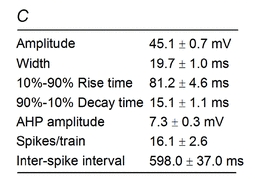

In [1]:
from IPython.display import Image 
Image(filename='worm_muscle.png')

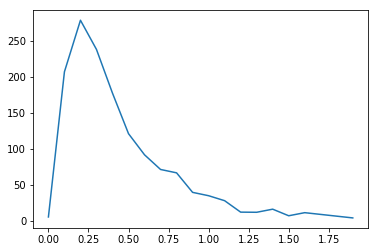

/home/jovyan/work/mount


In [13]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import bar
from matplotlib import pyplot as plt
df = pd.DataFrame()
df = df.from_csv('digitized_histogram.csv')
columns = df.columns[0]
histogram_values = list(df.values)
histogram_values = [ float(i) for i in histogram_values ]
histogram_values.insert(0,float(df.columns[0]))
cv_axis = np.linspace(0,2,len(histogram_values))
df2 = pd.DataFrame(list(zip(cv_axis,histogram_values)))
fig = plt.figure()
width =  cv_axis[1] - cv_axis[0]
ind = cv_axis
#sum_of_hist = np.sum(histogram_values)
bins = np.arange(0,2.0,2.0/(len(histogram_values)))
plt.plot(bins,histogram_values)#,bins=np.arange(0,10*len(histogram_values),2));
plt.show()
bin_widths = 2.0/len(histogram_values)
!pwd


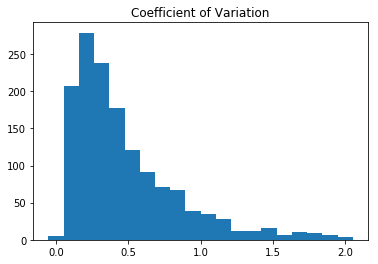

In [3]:
fig.clear()
plt.bar(cv_axis, histogram_values, width=width)
plt.title('Coefficient of Variation')
plt.show()


In [4]:
fake_data = []
for i in range(0,len(histogram_values)):
    x = bins[i]
    counts = histogram_values[i]
    fake_data += [x]*int(counts)

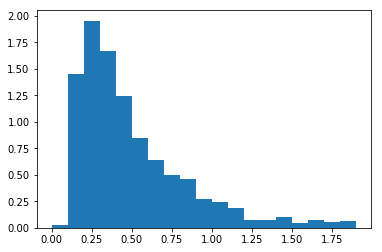

In [5]:
# Do the fit on the fake data to get the estmated parameters
from scipy.stats import gamma
shape,loc,scale = gamma.fit(fake_data)
plt.hist(fake_data,bins=np.arange(0,2.0,0.1),normed=True);

gamma parameters: 1.9641300373774164,-0.003643150752444655,0.23028107368240416
mean: 0.4486588231066874 and variance 0.10415658416895163


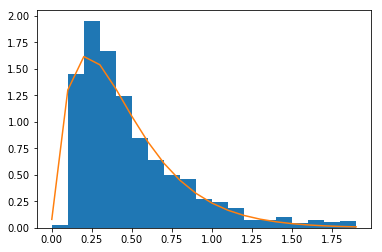

In [12]:
# Do the fit on the fake data to get the estmated parameters
shape,loc,scale = gamma.fit(fake_data)


mean, var, skew, kurt = gamma.stats(shape,loc=loc,scale=scale, moments='mvsk')
# Show the fake data, this time normed to integral 1
plt.hist(fake_data,bins=np.arange(0,2.0,0.1),normed=True);
# Show the gamma pdf with the estimated parameters.  
# It should match the fake data normed histogram pretty well, but might be slightly offset due
# to histogram bins not being centered
xs = np.arange(0,2.0,0.1)
plt.plot(xs,gamma.pdf(xs,shape,loc=loc,scale=scale));
print('gamma parameters: {0},{1},{2}'.format(shape,loc,scale))
print('mean: {0} and variance {1}'.format(mean,var))


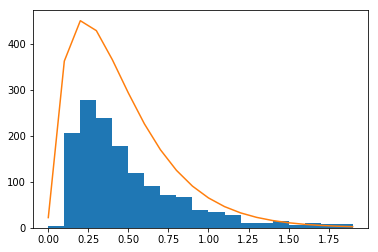

In [8]:
plt.hist(fake_data,bins=np.arange(0,2,0.1));

shape,loc,scale = gamma.fit(fake_data)

xs = np.arange(0,2.0,0.1)
plt.plot(xs,max(histogram_values)*gamma.pdf(xs,shape,loc=loc,scale=scale));
#print(shape,loc,scale)
#print(max(fake_data))
#print(fake_data)

Of 1432 trials, the mean value of the coefficient of variation is approximately 
CV 0.736842   index of column 1 is 71.086054
the mode of the CV is 0.210526 index 278.73
The data is obviously skewed and the mode is possibly a good descriptor.


In [9]:
#print(histogram_values)

[4.994708133192262, 207.0300415208012, 278.73890743303747, 238.1136530163641, 177.2490433933076, 120.8947325571928, 91.4882357730196, 71.08605389562808, 66.39664577057714, 39.23715704632423, 34.564031588374064, 27.64389807050384, 11.71944964585191, 11.524057640641555, 15.83896442237233, 6.671822844581811, 10.970446959211811, 8.54432956118194, 6.101929496051298, 3.675812098021424]
